## Import Modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

---
## Data Wrangling

In [2]:
data_filepath = os.path.join('./data', 'tmdb-movies.csv')

df = pd.read_csv(data_filepath)

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.dropna(subset=['id', 'imdb_id'], inplace=True)

In [6]:
df[['genres', 'cast', 'director', 'tagline', 'keywords', 'production_companies', 'homepage', 'overview']] = \
    df[['genres', 'cast', 'director', 'tagline', 'keywords', 'production_companies', 'homepage', \
       'overview']].fillna(value='')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10856 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10856 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10856 non-null  float64
 3   budget                10856 non-null  int64  
 4   revenue               10856 non-null  int64  
 5   original_title        10856 non-null  object 
 6   cast                  10856 non-null  object 
 7   homepage              10856 non-null  object 
 8   director              10856 non-null  object 
 9   tagline               10856 non-null  object 
 10  keywords              10856 non-null  object 
 11  overview              10856 non-null  object 
 12  runtime               10856 non-null  int64  
 13  genres                10856 non-null  object 
 14  production_companies  10856 non-null  object 
 15  release_date       

In [8]:
new_df = df[['id', 'revenue', 'release_year']]

In [9]:
new_df = pd.concat([new_df, df.genres.str.get_dummies(sep='|')],1)

---
## Question 1: What kinds of properties are associated with movies that have high revenues?

In [10]:
df['revenue'].describe()

count    1.085600e+04
mean     3.986000e+07
std      1.170511e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.404690e+07
max      2.781506e+09
Name: revenue, dtype: float64

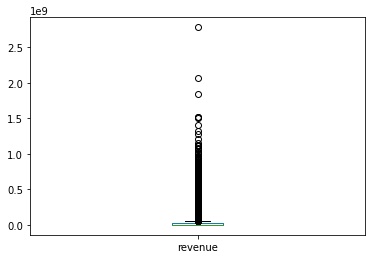

In [11]:
df['revenue'].plot.box()

In [12]:
revenue_by_year = new_df.set_index(['release_year'])['revenue'].sum(level=[0]).sort_values()

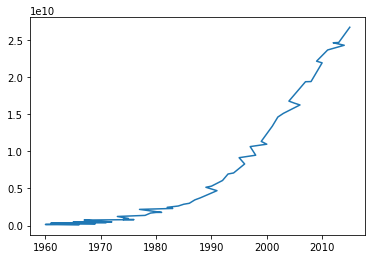

In [13]:
plt.plot(revenue_by_year.index, revenue_by_year)

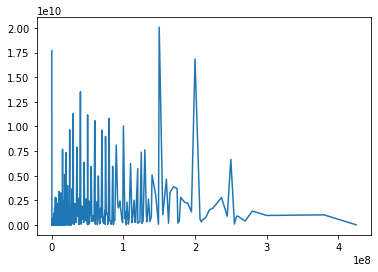

In [14]:
revenue_by_budget = df.set_index(['budget'])['revenue'].sum(level=[0]).sort_index()

plt.plot(revenue_by_budget.index, revenue_by_budget)

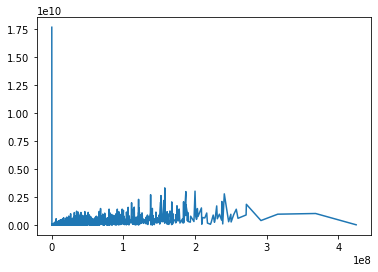

In [15]:
revenue_by_budget_adj = df.set_index(['budget_adj'])['revenue'].sum(level=[0]).sort_index()

plt.plot(revenue_by_budget_adj.index, revenue_by_budget_adj)

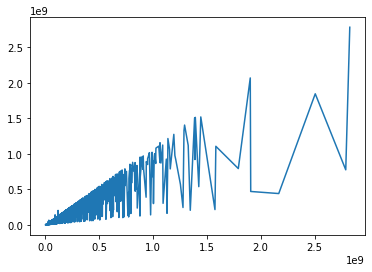

In [16]:
revenue_by_revenue_adj = df.set_index(['revenue_adj'])['revenue'].sum(level=[0]).sort_index()

plt.plot(revenue_by_revenue_adj.index, revenue_by_revenue_adj)

In [17]:
revenue_by_adventure = new_df.set_index(['Adventure'])['revenue'].sum(level=[0]).sort_values()

revenue_by_adventure

Adventure
1    166425793633
0    266294399242
Name: revenue, dtype: int64

In [18]:
revenue_by_action = new_df.set_index(['Action'])['revenue'].sum(level=[0]).sort_values()

revenue_by_action

Action
1    173543608094
0    259176584781
Name: revenue, dtype: int64

In [19]:
revenue_by_fantasy = new_df.set_index(['Fantasy'])['revenue'].sum(level=[0]).sort_values()

revenue_by_fantasy

Fantasy
1     88223309887
0    344496882988
Name: revenue, dtype: int64

In [20]:
revenue_by_family = new_df.set_index(['Family'])['revenue'].sum(level=[0]).sort_values()

revenue_by_family

Family
1     89165240116
0    343554952759
Name: revenue, dtype: int64

In [21]:
revenue_by_sf = new_df.set_index(['Science Fiction'])['revenue'].sum(level=[0]).sort_values()

revenue_by_sf

Science Fiction
1     86203712824
0    346516480051
Name: revenue, dtype: int64

In [22]:
revenue_by_animation = new_df.set_index(['Animation'])['revenue'].sum(level=[0]).sort_values()

revenue_by_animation

Animation
1     52603987494
0    380116205381
Name: revenue, dtype: int64

In [23]:
revenue_by_war = new_df.set_index(['War'])['revenue'].sum(level=[0]).sort_values()

revenue_by_war

War
1     12853399491
0    419866793384
Name: revenue, dtype: int64

In [24]:
revenue_by_thriller = new_df.set_index(['Thriller'])['revenue'].sum(level=[0]).sort_values()

revenue_by_thriller

Thriller
1    121305476800
0    311414716075
Name: revenue, dtype: int64

In [25]:
revenue_by_crime = new_df.set_index(['Crime'])['revenue'].sum(level=[0]).sort_values()

revenue_by_crime

Crime
1     57368134868
0    375352058007
Name: revenue, dtype: int64

In [26]:
revenue_by_mystery = new_df.set_index(['Mystery'])['revenue'].sum(level=[0]).sort_values()

revenue_by_mystery

Mystery
1     32576228996
0    400143963879
Name: revenue, dtype: int64

In [27]:
revenue_by_history = new_df.set_index(['History'])['revenue'].sum(level=[0]).sort_values()

revenue_by_history

History
1     10691938934
0    422028253941
Name: revenue, dtype: int64

In [28]:
revenue_by_western = new_df.set_index(['Western'])['revenue'].sum(level=[0]).sort_values()

revenue_by_western

Western
1      4713837032
0    428006355843
Name: revenue, dtype: int64

In [29]:
revenue_by_comedy = new_df.set_index(['Comedy'])['revenue'].sum(level=[0]).sort_values()

revenue_by_comedy

Comedy
1    142337036180
0    290383156695
Name: revenue, dtype: int64

In [30]:
revenue_by_romance = new_df.set_index(['Romance'])['revenue'].sum(level=[0]).sort_values()

revenue_by_romance

Romance
1     61104656624
0    371615536251
Name: revenue, dtype: int64

In [31]:
revenue_by_music = new_df.set_index(['Music'])['revenue'].sum(level=[0]).sort_values()

revenue_by_music

Music
1     11657281626
0    421062911249
Name: revenue, dtype: int64

In [32]:
revenue_by_tm = new_df.set_index(['TV Movie'])['revenue'].sum(level=[0]).sort_values()

revenue_by_tm

TV Movie
1        42000000
0    432678192875
Name: revenue, dtype: int64

In [33]:
revenue_by_foreign = new_df.set_index(['Foreign'])['revenue'].sum(level=[0]).sort_values()

revenue_by_foreign

Foreign
1       285846449
0    432434346426
Name: revenue, dtype: int64

In [34]:
revenue_by_documentary = new_df.set_index(['Documentary'])['revenue'].sum(level=[0]).sort_values()

revenue_by_documentary

Documentary
1      1061375637
0    431658817238
Name: revenue, dtype: int64

In [35]:
revenue_by_drama = new_df.set_index(['Drama'])['revenue'].sum(level=[0]).sort_values()

revenue_by_drama

Drama
1    139146504255
0    293573688620
Name: revenue, dtype: int64

In [36]:
revenue_by_horror = new_df.set_index(['Horror'])['revenue'].sum(level=[0]).sort_values()

revenue_by_horror

Horror
1     27538937718
0    405181255157
Name: revenue, dtype: int64

In [37]:
df.set_index(['genres'])['revenue'].sum(level=[0]).sort_values(ascending=False)

genres
Comedy                                    20323889661
Drama                                     15107533347
Comedy|Romance                            11545724341
Adventure|Fantasy|Action                   7597483556
Comedy|Drama|Romance                       7251175696
                                             ...     
Adventure|Drama|Action|Thriller|Crime               0
Action|Crime|Drama|Western                          0
Action|Adventure|Crime|Drama|Family                 0
Comedy|Family|Music|Romance                         0
Mystery|Science Fiction|Thriller|Drama              0
Name: revenue, Length: 2038, dtype: int64

In [38]:
df.set_index(['cast'])['revenue'].sum(level=[0]).sort_values(ascending=False)

cast
Elijah Wood|Ian McKellen|Viggo Mortensen|Liv Tyler|Orlando Bloom                    2916544743
Sam Worthington|Zoe Saldana|Sigourney Weaver|Stephen Lang|Michelle Rodriguez        2781505847
Jennifer Lawrence|Josh Hutcherson|Liam Hemsworth|Woody Harrelson|Elizabeth Banks    2189157571
Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley                    2068178225
Martin Freeman|Ian McKellen|Richard Armitage|Ken Stott|Graham McTavish              1913519788
                                                                                       ...    
Tom Hiddleston|Tilda Swinton|Mia Wasikowska|John Hurt|Anton Yelchin                          0
Paul Newman|Jackie Gleason|Piper Laurie|George C. Scott|Myron McCormick                      0
Deborah Kerr|Peter Wyngarde|Megs Jenkins|Michael Redgrave|Martin Stephens                    0
Charlton Heston|Sophia Loren|Raf Vallone|GeneviÃ¨ve Page|John Fraser                         0
Harold P. Warren|Tom Neyman|John Reynolds|Dia

In [39]:
df.set_index(['tagline'])['revenue'].sum(level=[0]).sort_values(ascending=False)

tagline
                                                  10361555303
Enter the World of Pandora.                        2781505847
Every generation has a story.                      2068178225
Nothing on Earth could come between them.          1845034188
Some assembly required.                            1519557910
                                                     ...     
The Story Of An American Band                               0
Existing Soon.                                              0
What are you willing to believe?                            0
I just wanted somebody to believe me.                       0
You don't need superpowers to be a super hero.              0
Name: revenue, Length: 7995, dtype: int64

In [40]:
df.set_index(['director'])['revenue'].sum(level=[0]).sort_values(ascending=False)

director
Steven Spielberg                   9018563772
Peter Jackson                      6523244659
James Cameron                      5841894863
Michael Bay                        4917208171
Christopher Nolan                  4167548502
                                      ...    
Darrell Rooney|Jeannine Roussel             0
Owen Hurley                                 0
Gus Holwerda                                0
Pete Docter|Roger Gould                     0
Harold P. Warren                            0
Name: revenue, Length: 5065, dtype: int64

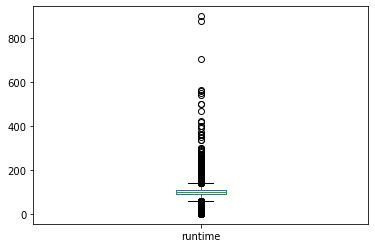

In [41]:
df['runtime'].plot.box()

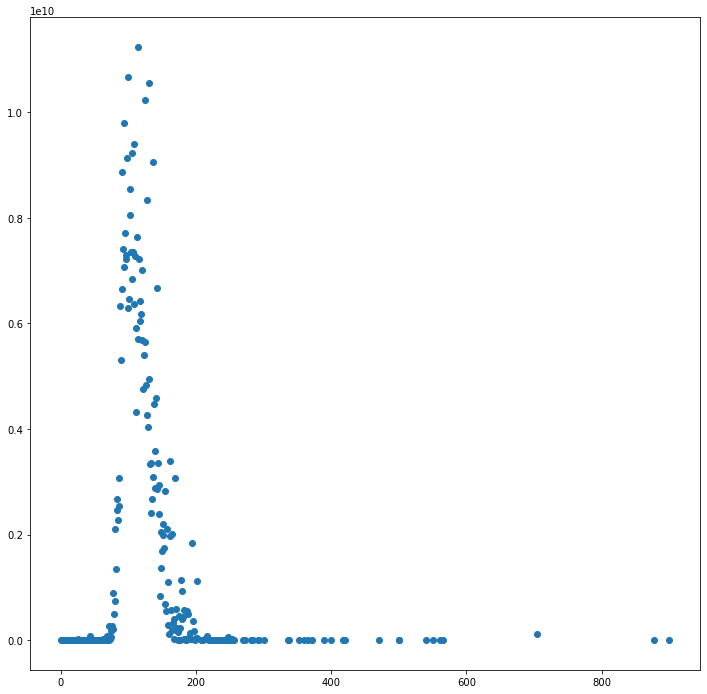

In [42]:
revenue_by_runtime = df.set_index(['runtime'])['revenue'].sum(level=[0]).sort_index()

fig, ax = plt.subplots(1, figsize=(12, 12))

ax.scatter(revenue_by_runtime.index, revenue_by_runtime)

<BarContainer object of 10805 artists>

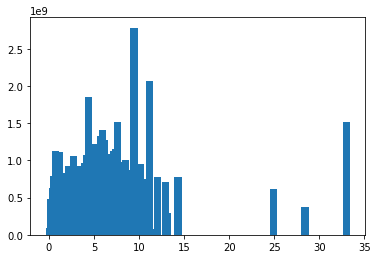

In [43]:
revenue_by_popularity = df.set_index(['popularity'])['revenue'].sum(level=[0]).sort_index()

plt.bar(revenue_by_popularity.index, revenue_by_popularity)

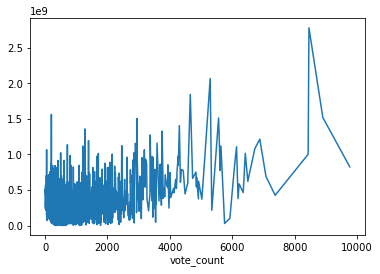

In [44]:
revenue_by_vote_count = df.set_index(['vote_count'])['revenue'].sum(level=[0]).sort_index()

revenue_by_vote_count.plot.line(x='vote_count', y='revenue')

### **Answer:**

* Increases as time goes by
* Vote count: ~8500
* Popularity: ~9
* Runtime: ~160
* Director(Top 3): Steven Spielberg, Peter Jackson, James Cameron
* Genres(Top 3): Comedy, Drama, Comedy & Romance     

---
## Question 2: Which genres are most popular from year to year? 

In [45]:
horror_by_release_year = new_df.set_index(['release_year'])['Horror'].sum(level=[0]).sort_index()
drama_by_release_year = new_df.set_index(['release_year'])['Drama'].sum(level=[0]).sort_index()
documentary_by_release_year = new_df.set_index(['release_year'])['Documentary'].sum(level=[0]).sort_index()
foreign_by_release_year = new_df.set_index(['release_year'])['Foreign'].sum(level=[0]).sort_index()
tm_by_release_year = new_df.set_index(['release_year'])['TV Movie'].sum(level=[0]).sort_index()
music_by_release_year = new_df.set_index(['release_year'])['Music'].sum(level=[0]).sort_index()
romance_by_release_year = new_df.set_index(['release_year'])['Romance'].sum(level=[0]).sort_index()
comedy_by_release_year = new_df.set_index(['release_year'])['Comedy'].sum(level=[0]).sort_index()
western_by_release_year = new_df.set_index(['release_year'])['Western'].sum(level=[0]).sort_index()
history_by_release_year = new_df.set_index(['release_year'])['History'].sum(level=[0]).sort_index()
mystery_by_release_year = new_df.set_index(['release_year'])['Mystery'].sum(level=[0]).sort_index()
crime_by_release_year = new_df.set_index(['release_year'])['Crime'].sum(level=[0]).sort_index()
thriller_by_release_year = new_df.set_index(['release_year'])['Thriller'].sum(level=[0]).sort_index()
war_by_release_year = new_df.set_index(['release_year'])['War'].sum(level=[0]).sort_index()
animation_by_release_year = new_df.set_index(['release_year'])['Animation'].sum(level=[0]).sort_index()
sf_by_release_year = new_df.set_index(['release_year'])['Science Fiction'].sum(level=[0]).sort_index()
family_by_release_year = new_df.set_index(['release_year'])['Family'].sum(level=[0]).sort_index()
fantasy_by_release_year = new_df.set_index(['release_year'])['Fantasy'].sum(level=[0]).sort_index()
action_by_release_year = new_df.set_index(['release_year'])['Action'].sum(level=[0]).sort_index()
adventure_by_release_year = new_df.set_index(['release_year'])['Adventure'].sum(level=[0]).sort_index()

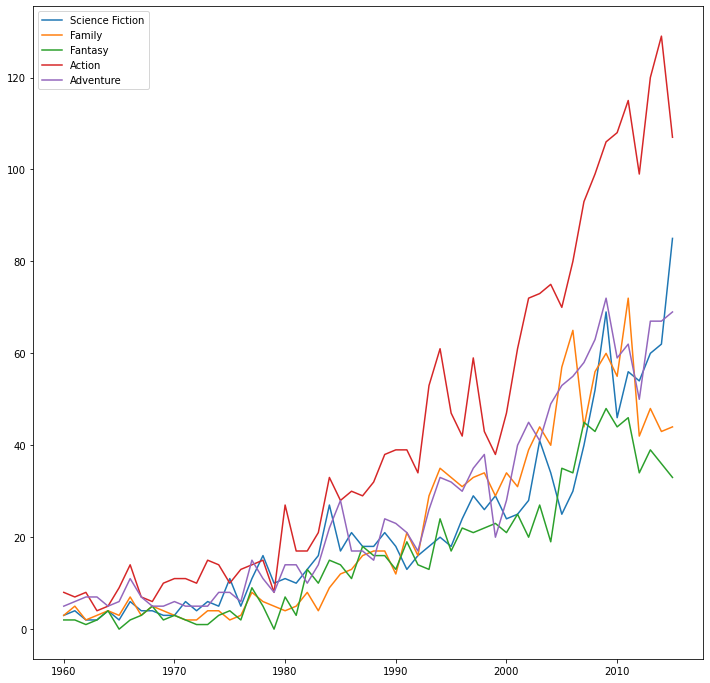

In [46]:
NUM_COLORS = 5

cm = plt.get_cmap('rainbow')

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

ax.plot(sf_by_release_year.index, sf_by_release_year, label='Science Fiction')
ax.plot(family_by_release_year.index, family_by_release_year, label='Family')
ax.plot(fantasy_by_release_year.index, fantasy_by_release_year, label='Fantasy')
ax.plot(action_by_release_year.index, action_by_release_year, label='Action')
ax.plot(adventure_by_release_year.index, adventure_by_release_year, label='Adventure')

plt.legend()
plt.show()

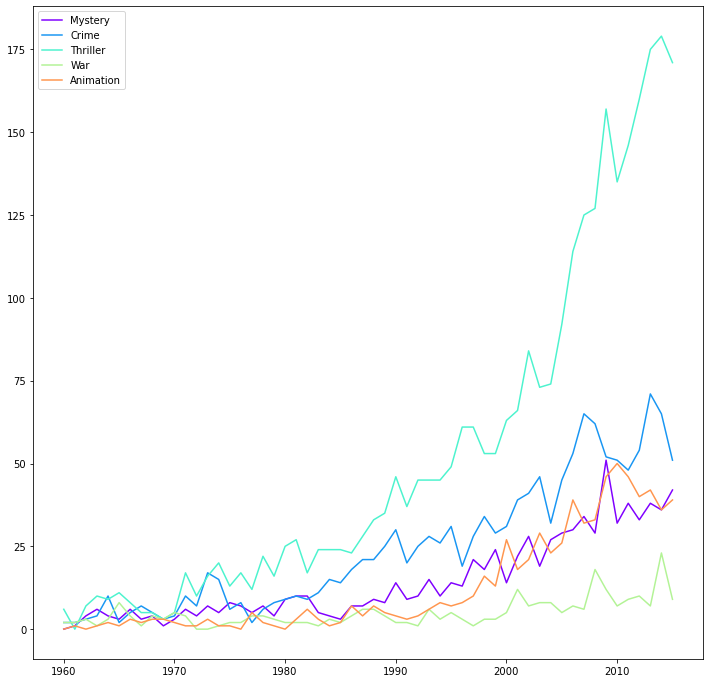

In [47]:
NUM_COLORS = 5

cm = plt.get_cmap('rainbow')

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

ax.plot(mystery_by_release_year.index, mystery_by_release_year, label='Mystery')
ax.plot(crime_by_release_year.index, crime_by_release_year, label='Crime')
ax.plot(thriller_by_release_year.index, thriller_by_release_year, label='Thriller')
ax.plot(war_by_release_year.index, war_by_release_year, label='War')
ax.plot(animation_by_release_year.index, animation_by_release_year, label='Animation')

plt.legend()
plt.show()

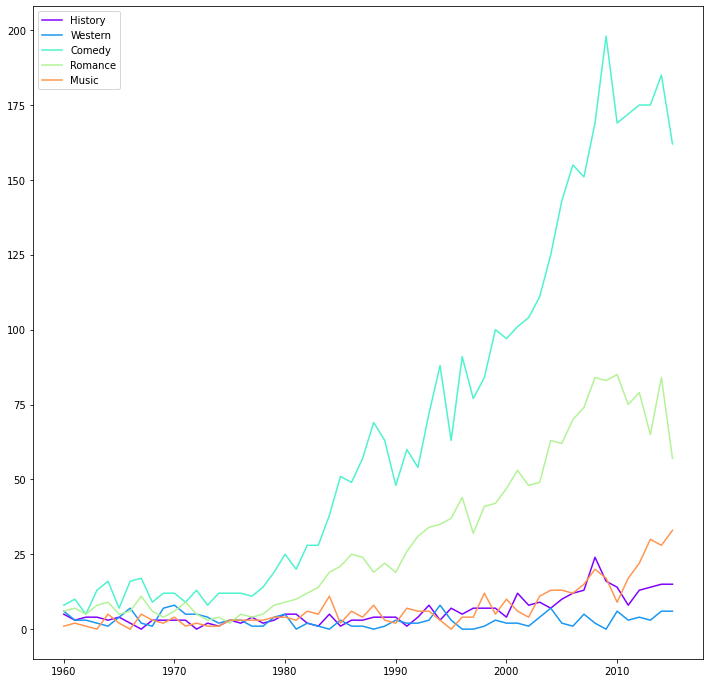

In [48]:
NUM_COLORS = 5

cm = plt.get_cmap('rainbow')

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

ax.plot(history_by_release_year.index, history_by_release_year, label='History')
ax.plot(western_by_release_year.index, western_by_release_year, label='Western')
ax.plot(comedy_by_release_year.index, comedy_by_release_year, label='Comedy')
ax.plot(romance_by_release_year.index, romance_by_release_year, label='Romance')
ax.plot(music_by_release_year.index, music_by_release_year, label='Music')

plt.legend()
plt.show()

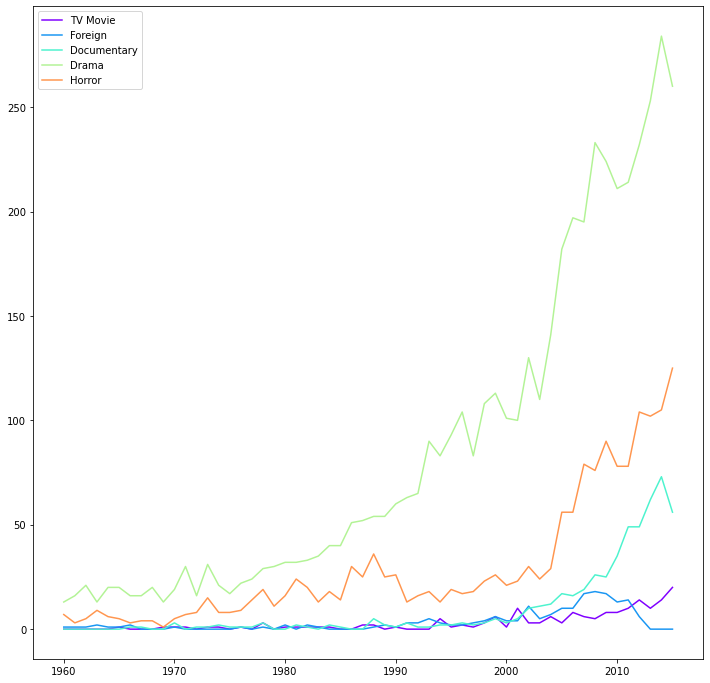

In [49]:
NUM_COLORS = 5

cm = plt.get_cmap('rainbow')

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

ax.plot(tm_by_release_year.index, tm_by_release_year, label='TV Movie')
ax.plot(foreign_by_release_year.index, foreign_by_release_year, label='Foreign')
ax.plot(documentary_by_release_year.index, documentary_by_release_year, label='Documentary')
ax.plot(drama_by_release_year.index, drama_by_release_year, label='Drama')
ax.plot(horror_by_release_year.index, horror_by_release_year, label='Horror')

plt.legend()
plt.show()

### **Answer:**

* Horror
* TV Movie
* Music
* Science Fiction